In [1]:
import os
import pandas as pd

validation_data = pd.read_csv('human_validated_keyword_data.csv')
validation_data.head()

,title,year,venue,topic,Has Code,Has Public Dataset,manual has code,manual has public dataset,topic makes sense,true topic
0,Comparing outcomes of out-of-hospital cardiac ...,2023,pubmed,E.H.R,False,No Public Dataset,False,No Public Dataset,TRUE,E.H.R
1,Pre-CCRT 18-fluorodeoxyglucose PET-CT improves...,2023,pubmed,E.H.R,False,No Public Dataset,False,No Public Dataset,FALSE,Biomedicine
2,The âBeam-Me-In Strategyâ â remote hapti...,2019,pubmed,E.H.R,False,No Public Dataset,False,No Public Dataset,TRUE,E.H.R
3,Attentive Adversarial Network for Large-Scale ...,2020,MLHC,Biosignals,False,Physionet,False,"SHHS, Physionet",TRUE,Biosignals
4,Representation Learning Approaches to Detect F...,2018,MLHC,Biosignals,False,Physionet,False,"Physionet, MIT-BIH",TRUE,Biosignals


In [2]:
validation_data.columns

Index(['title', 'year', 'venue', 'topic', 'Has Code', 'Has Public Dataset',
       'manual has code', 'manual has public dataset', 'topic makes sense',
       'true topic'],
      dtype='object')

In [3]:
print(validation_data.head())

                                               title  year   venue  \
0  Comparing outcomes of out-of-hospital cardiac ...  2023  pubmed   
1  Pre-CCRT 18-fluorodeoxyglucose PET-CT improves...  2023  pubmed   
2  The âBeam-Me-In Strategyâ â remote hapti...  2019  pubmed   
3  Attentive Adversarial Network for Large-Scale ...  2020    MLHC   
4  Representation Learning Approaches to Detect F...  2018    MLHC   

        topic  Has Code Has Public Dataset  manual has code  \
0       E.H.R     False  No Public Dataset            False   
1       E.H.R     False  No Public Dataset            False   
2       E.H.R     False  No Public Dataset            False   
3  Biosignals     False          Physionet            False   
4  Biosignals     False          Physionet            False   

  manual has public dataset topic makes sense   true topic  
0         No Public Dataset             TRUE         E.H.R  
1         No Public Dataset             FALSE  Biomedicine  
2         No Publ

In [4]:
df = validation_data
validation_data.columns

Index(['title', 'year', 'venue', 'topic', 'Has Code', 'Has Public Dataset',
       'manual has code', 'manual has public dataset', 'topic makes sense',
       'true topic'],
      dtype='object')

In [5]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def to_binary(series):
    if series.dtype == bool:
        return series
    elif series.dtype == 'object':
        return series.map({'True': True, 'False': False, 
                           'Yes': True, 'No': False, 
                           '1': True, '0': False})
    else:
        return series.astype(bool)

def string_to_list(s):
    if pd.isna(s):
        return []
    return [item.strip().lower() for item in s.split(',')]

def is_subset(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return set1.issubset(set2)

def calculate_metrics(df, predicted_col, actual_col, is_dataset=False):
    if is_dataset:
        y_pred = df.apply(lambda row: is_subset(string_to_list(row[actual_col]), 
                                                string_to_list(row[predicted_col])), axis=1)
        y_true = df[actual_col].notna()
    else:
        y_pred = to_binary(df[predicted_col])
        y_true = to_binary(df[actual_col])
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Rate of Pred: {y_pred.mean()}") #
    print(f"Rate of True: {y_true.mean()}") #

    return precision, recall, f1, accuracy

# Calculate metrics for "Has Code"
code_precision, code_recall, code_f1, code_accuracy = calculate_metrics(df, 'Has Code', 'manual has code')

print("Metrics for Code Sharing:")
print(f"Precision: {code_precision:.2f}")
print(f"Recall: {code_recall:.2f}")
print(f"F1 Score: {code_f1:.2f}")
print(f"Accuracy: {code_accuracy:.2f}")


# Calculate metrics for "Has Public Dataset"
dataset_precision, dataset_recall, dataset_f1, dataset_accuracy = calculate_metrics(df, 'Has Public Dataset', 'manual has public dataset', is_dataset=True)


print("\nMetrics for Public Dataset Usage:")
print(f"Precision: {dataset_precision:.2f}")
print(f"Recall: {dataset_recall:.2f}")
print(f"F1 Score: {dataset_f1:.2f}")
print(f"Accuracy: {dataset_accuracy:.2f}")

Rate of Pred: 0.23333333333333334
Rate of True: 0.23333333333333334
Metrics for Code Sharing:
Precision: 0.71
Recall: 0.71
F1 Score: 0.71
Accuracy: 0.87
Rate of Pred: 0.6333333333333333
Rate of True: 1.0

Metrics for Public Dataset Usage:
Precision: 1.00
Recall: 0.63
F1 Score: 0.78
Accuracy: 0.63


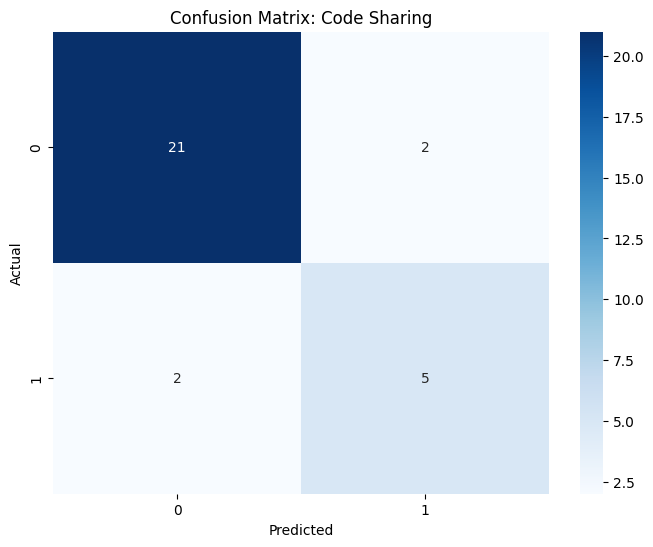

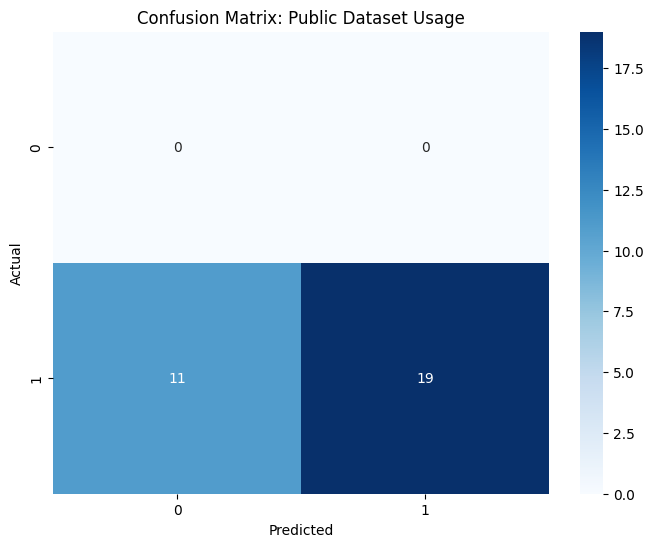

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def to_binary(series):
    if series.dtype == bool:
        return series
    elif series.dtype == 'object':
        return series.map({'True': True, 'False': False, 
                           'Yes': True, 'No': False, 
                           '1': True, '0': False})
    else:
        return series.astype(bool)

def string_to_list(s):
    if pd.isna(s):
        return []
    return [item.strip().lower() for item in s.split(',')]

def is_subset(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return set1.issubset(set2)

def plot_confusion_matrix(df, predicted_col, actual_col, title, is_dataset=False):
    if is_dataset:
        y_pred = df.apply(lambda row: is_subset(string_to_list(row[actual_col]), 
                                                string_to_list(row[predicted_col])), axis=1)
        y_true = df[actual_col].notna()
    else:
        y_pred = to_binary(df[predicted_col])
        y_true = to_binary(df[actual_col])
    
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrix for "Has Code"
plot_confusion_matrix(df, 'Has Code', 'manual has code', 'Confusion Matrix: Code Sharing')

# Plot confusion matrix for "Has Public Dataset"
plot_confusion_matrix(df, 'Has Public Dataset', 'manual has public dataset', 'Confusion Matrix: Public Dataset Usage', is_dataset=True)

In [7]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def to_binary(series):
    if series.dtype == bool:
        return series
    elif series.dtype == 'object':
        return series.map({'True': True, 'False': False, 
                           'Yes': True, 'No': False, 
                           '1': True, '0': False})
    else:
        return series.astype(bool)

def string_to_list(s):
    if pd.isna(s):
        return []
    return [item.strip().lower() for item in s.split(',')]

def is_subset(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return set1.issubset(set2)

def has_overlap(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return len(set1.intersection(set2)) > 0

def calculate_metrics(df, predicted_col, actual_col, is_dataset=False):
    y_pred = to_binary(df[predicted_col])
    y_true = to_binary(df[actual_col])
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    return precision, recall, f1, accuracy

# Calculate metrics for "Has Code"
code_metrics = calculate_metrics(df, 'Has Code', 'manual has code')

print("Metrics for Code Sharing:")
print(f"Precision: {code_metrics[0]:.2f}")
print(f"Recall: {code_metrics[1]:.2f}")
print(f"F1 Score: {code_metrics[2]:.2f}")
print(f"Accuracy: {code_metrics[3]:.2f}")


Metrics for Code Sharing:
Precision: 0.71
Recall: 0.71
F1 Score: 0.71
Accuracy: 0.87


In [8]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def binary_dataset_classification(df, predicted_col, actual_col):
    # For predicted values
    df['pred_binary'] = df[predicted_col].apply(lambda x: 0 if 'no public dataset' in str(x).lower() else 1)
    
    # For actual values
    df['actual_binary'] = df[actual_col].apply(lambda x: 0 if 'no public dataset' in str(x).lower() else 1)
    
    return df['pred_binary'], df['actual_binary']

def calculate_metrics(df, predicted_col, actual_col, is_dataset=False):
    if is_dataset:
        y_pred, y_true = binary_dataset_classification(df, predicted_col, actual_col)
        # print(y_pred)
        # print(y_true)
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1

# Calculate metrics for "Has Code"
# code_metrics = calculate_metrics(df, 'Has Code', 'manual has code')

# Calculate metrics for "Has Public Dataset"
dataset_metrics = calculate_metrics(df, 'Has Public Dataset', 'manual has public dataset', is_dataset=True)

# print("Metrics for Code Sharing:")
# print(f"Accuracy: {code_metrics[0]:.2f}")
# print(f"Precision: {code_metrics[1]:.2f}")
# print(f"Recall: {code_metrics[2]:.2f}")
# print(f"F1 Score: {code_metrics[3]:.2f}")

print("\nMetrics for Public Dataset Usage:")
print(f"Accuracy: {dataset_metrics[0]:.2f}")
print(f"Precision: {dataset_metrics[1]:.2f}")
print(f"Recall: {dataset_metrics[2]:.2f}")
print(f"F1 Score: {dataset_metrics[3]:.2f}")


Metrics for Public Dataset Usage:
Accuracy: 0.77
Precision: 0.90
Recall: 0.60
F1 Score: 0.72


In [9]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def string_to_set(s):
    if pd.isna(s) or s == '' or 'no public dataset' in str(s).lower():
        return set()
    return set(item.strip().lower() for item in s.split(','))

def binary_dataset_classification(df, predicted_col, actual_col):
    # For predicted values
    df['pred_binary'] = df[predicted_col].apply(lambda x: 0 if 'no public dataset' in str(x).lower() else 1)
    
    # For actual values
    df['actual_binary'] = df[actual_col].apply(lambda x: 0 if 'no public dataset' in str(x).lower() else 1)
    
    return df['pred_binary'], df['actual_binary']

def count_disjoint_sets(df, predicted_col, actual_col):
    pred_sets = df[predicted_col].apply(string_to_set)
    actual_sets = df[actual_col].apply(string_to_set)
    
    disjoint_count = sum((pred_sets != actual_sets) & (pred_sets != set()) & (actual_sets != set()))
    total_with_datasets = sum((pred_sets != set()) | (actual_sets != set()))
    
    return disjoint_count, total_with_datasets

def calculate_metrics(df, predicted_col, actual_col, is_dataset=False):
    if is_dataset:
        y_pred, y_true = binary_dataset_classification(df, predicted_col, actual_col)
        disjoint_count, total_with_datasets = count_disjoint_sets(df, predicted_col, actual_col)
    else:
        y_pred = df[predicted_col].map({'False': 0, 'True': 1})
        y_true = df[actual_col].map({'False': 0, 'True': 1})
        disjoint_count, total_with_datasets = None, None
    
    print(f"Rate of Pred: {y_pred.mean()}") #
    print(f"Rate of True: {y_true.mean()}") #

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, disjoint_count, total_with_datasets

# Calculate metrics for "Has Code"
# code_metrics = calculate_metrics(df, 'Has Code', 'manual has code')

# Calculate metrics for "Has Public Dataset"
dataset_metrics = calculate_metrics(df, 'Has Public Dataset', 'manual has public dataset', is_dataset=True)


print("\nMetrics for Public Dataset Usage:")
print(f"Accuracy: {dataset_metrics[0]:.2f}")
print(f"Precision: {dataset_metrics[1]:.2f}")
print(f"Recall: {dataset_metrics[2]:.2f}")
print(f"F1 Score: {dataset_metrics[3]:.2f}")
print(f"Papers with disjoint dataset sets: {dataset_metrics[4]}")
print(f"Total papers with datasets (predicted or actual): {dataset_metrics[5]}")
print(f"Percentage of papers with disjoint sets: {dataset_metrics[4]/dataset_metrics[5]*100:.2f}%")

Rate of Pred: 0.3333333333333333
Rate of True: 0.5

Metrics for Public Dataset Usage:
Accuracy: 0.77
Precision: 0.90
Recall: 0.60
F1 Score: 0.72
Papers with disjoint dataset sets: 4
Total papers with datasets (predicted or actual): 16
Percentage of papers with disjoint sets: 25.00%


In [10]:
df['topic makes sense'] = df['topic makes sense'].map({'TRUE': True, 'FALSE': False})
df['topic makes sense'].value_counts()

True     27
False     2
Name: topic makes sense, dtype: int64

# Validating Topic Classification

In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

def calculate_topic_metrics(df, predicted_col, actual_col):
    # Create a LabelEncoder instance
    le = LabelEncoder()
    
    # Fit the LabelEncoder on all unique values from both columns
    all_topics = set(df[predicted_col].unique()) | set(df[actual_col].unique())
    le.fit(list(all_topics))
    
    # Transform the predicted and actual values
    y_pred = le.transform(df[predicted_col])
    y_true = le.transform(df[actual_col])
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate class-wise metrics
    class_metrics = {}
    for i, class_name in enumerate(le.classes_):
        class_metrics[class_name] = {
            'precision': precision_score(y_true, y_pred, labels=[i], average='weighted'),
            'recall': recall_score(y_true, y_pred, labels=[i], average='weighted'),
            'f1': f1_score(y_true, y_pred, labels=[i], average='weighted')
        }
    
    return accuracy, precision, recall, f1, cm, class_metrics, le.classes_

# Assuming 'df' is your DataFrame
topic_metrics = calculate_topic_metrics(df, 'topic', 'true topic')

print("\nMetrics for Topic Classification:")
print(f"Overall Accuracy: {topic_metrics[0]:.2f}")
print(f"Overall Precision: {topic_metrics[1]:.2f}")
print(f"Overall Recall: {topic_metrics[2]:.2f}")
print(f"Overall F1 Score: {topic_metrics[3]:.2f}")

print("\nConfusion Matrix:")
print(topic_metrics[4])

print("\nClass-wise Metrics:")
for class_name, metrics in topic_metrics[5].items():
    print(f"\n{class_name}:")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall: {metrics['recall']:.2f}")
    print(f"  F1 Score: {metrics['f1']:.2f}")

# Calculate and print prediction rates for each class
pred_rates = df['topic'].value_counts(normalize=True)
true_rates = df['true topic'].value_counts(normalize=True)

print("\nPrediction Rates:")
for topic in topic_metrics[6]:
    pred_rate = pred_rates.get(topic, 0)
    true_rate = true_rates.get(topic, 0)
    print(f"{topic}:")
    print(f"  Predicted: {pred_rate:.2f}")
    print(f"  Actual: {true_rate:.2f}")


Metrics for Topic Classification:
Overall Accuracy: 0.93
Overall Precision: 0.94
Overall Recall: 0.93
Overall F1 Score: 0.93

Confusion Matrix:
[[ 4  0  0  2]
 [ 0  6  0  0]
 [ 0  0  5  0]
 [ 0  0  0 13]]

Class-wise Metrics:

Biomedicine:
  Precision: 1.00
  Recall: 0.67
  F1 Score: 0.80

Biosignals:
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00

Clinical Images:
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00

E.H.R:
  Precision: 0.87
  Recall: 1.00
  F1 Score: 0.93

Prediction Rates:
Biomedicine:
  Predicted: 0.13
  Actual: 0.20
Biosignals:
  Predicted: 0.20
  Actual: 0.20
Clinical Images:
  Predicted: 0.17
  Actual: 0.17
E.H.R:
  Predicted: 0.50
  Actual: 0.43
